explore several methods to see if certain characteristics or features can be used to predict car price.

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [94]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [95]:
data = pd.read_csv("old-cars-data.txt", names = cols)
data.shape

(205, 26)

In [96]:
data.head

<bound method NDFrame.head of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd        

Identify and handle missing values

In [98]:
data = data.replace('?',np.NaN)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [99]:
data.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [100]:
data.isnull().any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [101]:
data.isnull().any().any()

True

In [102]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [103]:
avg_norm_loss = data['normalized-losses'].astype('float').mean()
avg_norm_loss

122.0

In [104]:
data['normalized-losses'].replace(np.NaN, avg_norm_loss, inplace = True)
data['normalized-losses']

0      122.0
1      122.0
2      122.0
3        164
4        164
       ...  
200       95
201       95
202       95
203       95
204       95
Name: normalized-losses, Length: 205, dtype: object

In [105]:
avg_bore = data['bore'].astype('float').mean()
data['bore'].replace(np.NaN, avg_bore, inplace = True)

avg_stroke = data['stroke'].astype('float').mean()
data['stroke'].replace(np.NaN, avg_stroke, inplace = True)

avg_horsepower = data['horsepower'].astype('float').mean()
data['horsepower'].replace(np.NaN, avg_horsepower, inplace = True)

avg_peakrpm = data['peak-rpm'].astype('float').mean()
data['peak-rpm'].replace(np.NaN, avg_peakrpm, inplace = True)

In [106]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

##### Num of doors Value with MODE

In [108]:
data['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [109]:
data['num-of-doors'].value_counts().idxmax()

'four'

In [110]:
data['num-of-doors'].replace(np.NaN, 'four', inplace = True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##### Drop all values(rows) with no price

In [112]:
data.dropna(subset = ['price'], axis = 0, inplace = True)
data.shape

(201, 26)

In [113]:
data['price'].isnull().sum()

0

In [114]:
data.isnull().sum().sum()

0

##### Convert to proper datatypes

In [116]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [117]:
data[["bore", "stroke"]] = data[["bore", "stroke"]].astype("float")
data[["normalized-losses"]] = data[["normalized-losses"]].astype("int")
data[["price"]] = data[["price"]].astype("float")
data[["peak-rpm"]] = data[["peak-rpm"]].astype("float")
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [118]:
data[["price"]] = data[["price"]].astype("float")

In [119]:
data['price'].dtype

dtype('float64')

In [120]:
data['highway-mpg'].corr(data['price'])


-0.704692265058953

In [121]:
data['highway-L/100km'] = 235.215 / data['highway-mpg']  # Conversion


In [122]:
data['highway-L/100km']

0       8.711667
1       8.711667
2       9.046731
3       7.840500
4      10.691591
         ...    
200     8.400536
201     9.408600
202    10.226739
203     8.711667
204     9.408600
Name: highway-L/100km, Length: 201, dtype: float64

In [123]:
data['highway-L/100km'].corr(data['price'])

0.8011176263981977

In [124]:
data['highway-mpg'] = 235.215/data['highway-mpg']

In [125]:
data['highway-mpg'].corr(data['price'])


0.8011176263981977

### Data Standardization

Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.



Transform mpg to L/100km:

The formula for unit conversion is

L/100km = 235 / mpg

In [159]:
data['highway-mpg'] = 235.215/data['highway-mpg']
data.rename(columns = {'highway-mpg': 'highway-L/100km'}, inplace = True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,13495.0,8.711667
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,16500.0,8.711667
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26.0,16500.0,9.046731
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30.0,13950.0,7.840500
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22.0,17450.0,10.691591


In [161]:
data['highway-L/100km']

,highway-L/100km,highway-L/100km
0,27.0,8.711667
1,27.0,8.711667
2,26.0,9.046731
3,30.0,7.840500
4,22.0,10.691591
...,...,...
200,28.0,8.400536
201,25.0,9.408600
202,23.0,10.226739
203,27.0,8.711667


In [40]:
data['highway-L/100km'] = (data['highway-L/100km'] - data['highway-L/100km'].mean()) / data['highway-L/100km'].std()  # Standardization

In [90]:
data['highway-L/100km']

,highway-L/100km,highway-L/100km
0,-0.540937,0.357871
1,-0.540937,0.357871
2,-0.687669,0.539732
3,-0.100741,-0.114967
4,-1.274597,1.432502
...,...,...
200,-0.394205,0.189000
201,-0.834401,0.736141
202,-1.127865,1.180197
203,-0.540937,0.357871


### Data Normalization

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

let's say we want to scale the columns "length", "width" and "height"

Target:would like to Normalize those variables so their value ranges from 0 to 1.

Approach: replace original value by (original value)/(maximum value)

In [44]:
data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,-0.540937,13495.0,0.357871
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,-0.540937,16500.0,0.357871
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,-0.687669,16500.0,0.539732
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,-0.100741,13950.0,-0.114967
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,-1.274597,17450.0,1.432502


In [45]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'highway-L/100km'],
      dtype='object')

In [46]:
data[['length','width']]

,length,width
0,0.811148,0.890278
1,0.811148,0.890278
2,0.822681,0.909722
3,0.848630,0.919444
4,0.848630,0.922222
...,...,...
200,0.907256,0.956944
201,0.907256,0.955556
202,0.907256,0.956944
203,0.907256,0.956944


In [47]:
data["height"] = data["height"]/data["height"].max()

### Binning

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins

In [51]:
data['horsepower'] = data['horsepower'].astype(int, copy = True)

In [52]:
data['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 201, dtype: int64

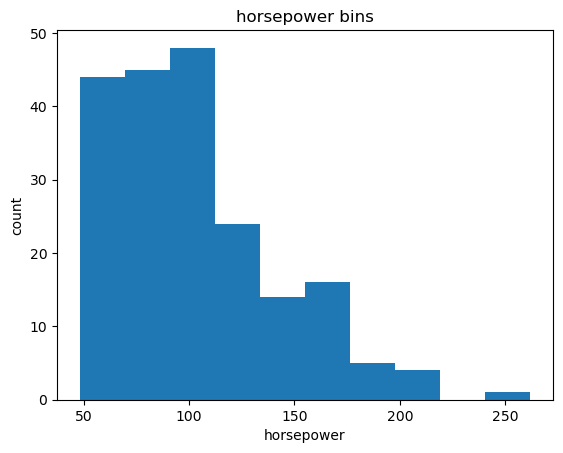

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data['horsepower'])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
plt.show()

We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

In [55]:
bins = np.linspace(min(data['horsepower']), max(data['horsepower']),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [56]:
bin_names = ['low','medium','high']

In [57]:
data['horsepower-binned'] = pd.cut(data['horsepower'],bins, labels = bin_names, include_lowest = True)
data[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,low
1,111,low
2,154,medium
3,102,low
4,115,low
5,110,low
6,110,low
7,110,low
8,140,medium
10,101,low


In [58]:
data['horsepower-binned'].value_counts()

low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

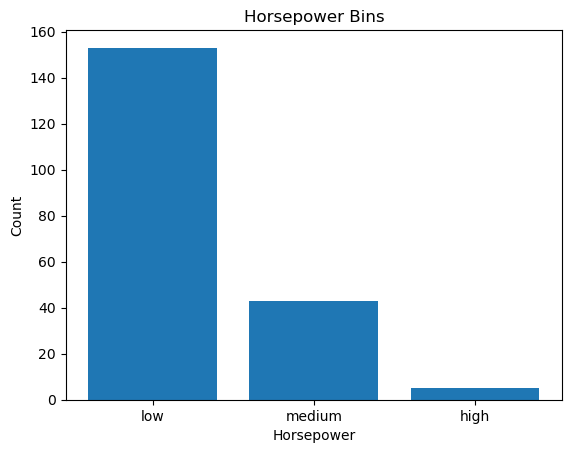

In [59]:
plt.bar(bin_names, data['horsepower-binned'].value_counts())

plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.title('Horsepower Bins')
plt.show()

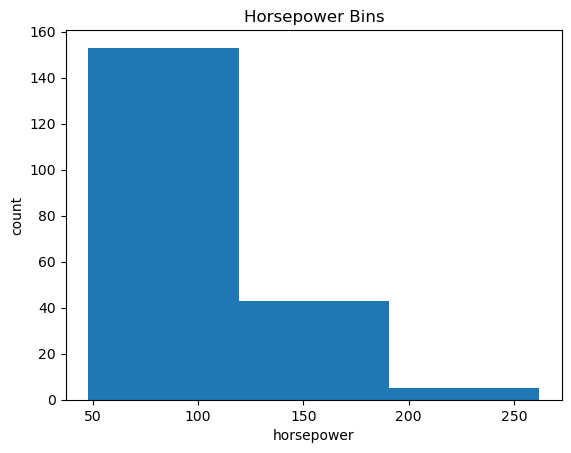

In [60]:
plt.hist(data['horsepower'], bins = 3)

plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("Horsepower Bins")
plt.show()

### Indicator variable(Dummy Variable)

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

In [63]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'highway-L/100km', 'horsepower-binned'],
      dtype='object')

In [64]:
dummy_variable_1 = pd.get_dummies(data['fuel-type'])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [65]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)

In [66]:
dummy_variable_1.columns

Index(['diesel', 'gas'], dtype='object')

In [67]:
data = pd.concat([data, dummy_variable_1],axis = 1)
data.drop("fuel-type", axis = 1, inplace=True)

In [68]:
dummy_variable_2 = pd.get_dummies(data['aspiration'])

dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

data = pd.concat([data, dummy_variable_2], axis=1)
data.drop('aspiration', axis = 1, inplace=True)

In [69]:
data.head(10)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,highway-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,-0.540937,13495.0,0.357871,low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,-0.540937,16500.0,0.357871,low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,-0.687669,16500.0,0.539732,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,-0.100741,13950.0,-0.114967,low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,-1.274597,17450.0,1.432502,low,0,1,1,0
5,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,5500.0,19,-0.834401,15250.0,0.736141,low,0,1,1,0
6,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,5500.0,19,-0.834401,17710.0,0.736141,low,0,1,1,0
7,1,122,audi,four,wagon,fwd,front,105.8,0.925997,0.991667,...,5500.0,19,-0.834401,18920.0,0.736141,low,0,1,1,0
8,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,5500.0,17,-1.568060,23875.0,2.012803,medium,0,1,0,1
10,2,192,bmw,two,sedan,rwd,front,101.2,0.849592,0.900000,...,5800.0,23,-0.247473,16430.0,0.031776,low,0,1,1,0


In [70]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,highway-L/100km,diesel,gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,2.010000e+02,201.000000,2.010000e+02,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,103.402985,5117.665368,25.179104,-2.121023e-16,13207.129353,-5.081618e-17,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,37.365650,478.113805,6.423220,1.000000e+00,7947.066342,1.000000e+00,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,-2.154988e+00,5118.000000,-2.006317e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,-8.344009e-01,7775.000000,-6.156182e-01,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5125.369458,24.000000,-1.007413e-01,10295.000000,-1.149666e-01,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,4.861863e-01,16500.000000,7.361410e-01,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,3.420825e+00,45400.000000,3.608629e+00,1.000000,1.000000,1.000000,1.000000


### 2. Analyzing Individual Feature Patterns using Visualization

In [72]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [73]:
print(data.dtypes)

symboling               int64
normalized-losses       int64
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm              float64
city-mpg                int64
highway-L/100km       float64
price                 float64
highway-L/100km       float64
horsepower-binned    category
diesel                  uint8
gas                     uint8
aspiration-std          uint8
aspiration-turbo        uint8
dtype: object


### Correlation

+1 → Perfect positive correlation (when one variable increases, the other also increases)
0 → No correlation (no linear relationship)
-1 → Perfect negative correlation (when one variable increases, the other decreases)

In [76]:
data_numeric = data.select_dtypes(include=['number'])

In [77]:
data_numeric.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,highway-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.075810,0.279740,-0.035527,0.036233,-0.082391,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.047089,0.241064,-0.241064,-0.218233,0.218233


In [78]:
data[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


/tmp/ipykernel_26298/1583045948.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


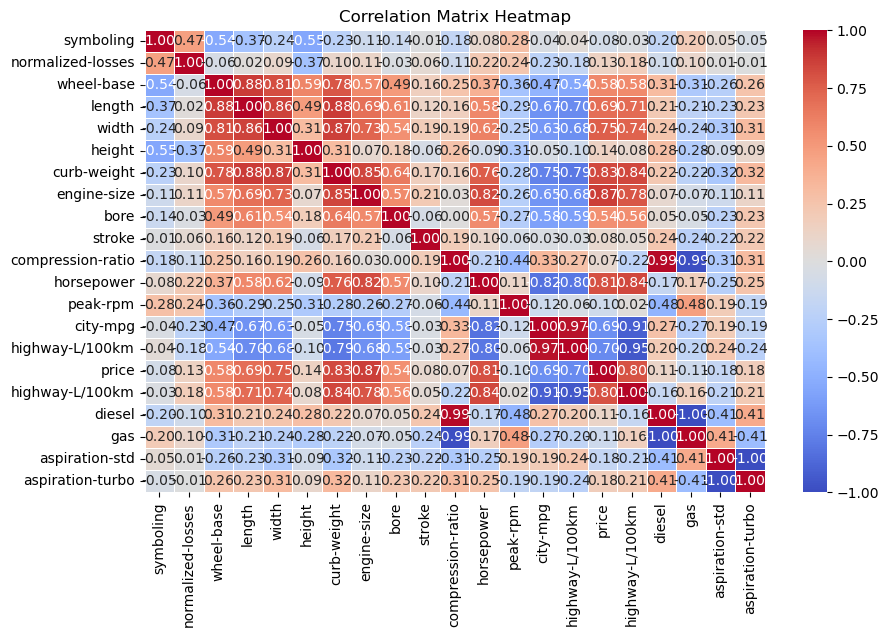

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Continuous numerical variables:

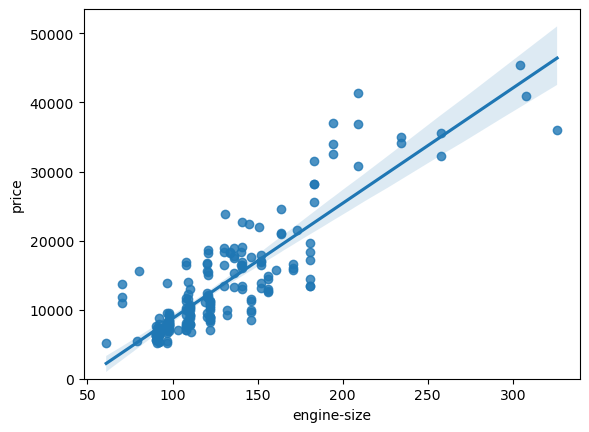

In [81]:
sns.regplot(x = 'engine-size', y = 'price', data = data)
plt.ylim(0, )
plt.show()

In [82]:
data['engine-size'].corr(data['price'])

0.8723351674455198

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

We can examine the correlation between 'engine-size' and 'price' and see it's approximately 0.87

In [84]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'price',
       'highway-L/100km', 'horsepower-binned', 'diesel', 'gas',
       'aspiration-std', 'aspiration-turbo'],
      dtype='object')

In [88]:
data['highway-L/100km']

,highway-L/100km,highway-L/100km
0,-0.540937,0.357871
1,-0.540937,0.357871
2,-0.687669,0.539732
3,-0.100741,-0.114967
4,-1.274597,1.432502
...,...,...
200,-0.394205,0.189000
201,-0.834401,0.736141
202,-1.127865,1.180197
203,-0.540937,0.357871


In [85]:
sns.regplot(x = 'highway-L/100km', y = 'price', data = data)
plt.title("Highway Miles per Gallon vs Price")
plt.ylabel("Price")
plt.show()

ValueError: regplot inputs must be 1d

In [ ]:
print(data[['highway-L/100km', 'price']].info())  # Check data types
print(data[['highway-L/100km', 'price']].isnull().sum())  # Check missing values


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['highway-L/100km'])
plt.show()

sns.boxplot(x=data['price'])
plt.show()


In [ ]:
Q1 = data['highway-L/100km'].quantile(0.25)
Q3 = data['highway-L/100km'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
data = data[(data['highway-L/100km'] >= Q1 - 1.5*IQR) & (data['highway-L/100km'] <= Q3 + 1.5*IQR)]


In [ ]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
data = data[(data['price'] >= Q1 - 1.5*IQR) & (data['price'] <= Q3 + 1.5*IQR)]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['highway-L/100km'])
plt.show()

sns.boxplot(x=data['price'])
plt.show()


In [ ]:
data['highway-L/100km'].corr(data['price'])